In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [8]:
def f(x, y):
    return x**2 + x*y - 2*x

def g(x, y):
    return x*y**2 + 3*y

In [9]:
def coupled_eqns(t, z):
    x, y = z
    dxdt = x**2 + x*y - 2*x
    dydt = x*y**2 + 3*y
    return [dxdt, dydt]


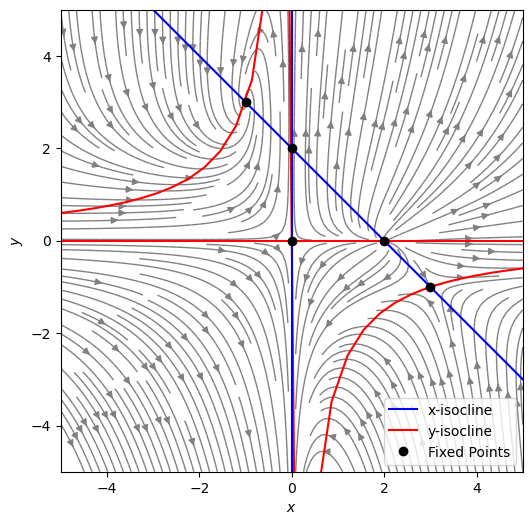

In [10]:
plt.close('all')
coords = np.linspace(-5, 5, 30)
x, y = np.meshgrid(coords, coords)
dx = x**2 + x*y - 2*x
dy = x*y**2 + 3*y
plt.figure(figsize=(6,6))
plt.gca().set_aspect('equal', adjustable='box')  # Make plot box square
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.title('2D Vector field: $f(x,y)=(-1-x^2+y, 1+x-y^2)$')
#plt.quiver(x, y, dx, dy)  # plot field as quiver
plt.streamplot(x, y, dx, dy,color='grey', linewidth=1, density=2)  # plot streamlines of field.
#plt.savefig('G3-DHO-underdampened.svg')

# plotting nullclines here

# y = 2 - x

x_vals = coords
y_vals = 2 - x_vals

plt.plot(x_vals, y_vals, color='blue', linestyle='-', label='x-isocline')

y1_vals = -3/x_vals

plt.plot(x_vals, y1_vals, color='red', linestyle='-', label='y-isocline')

plt.axhline(y=0, color='red', linestyle='-')
plt.axvline(x=0, color='blue', linestyle='-')

plt.xlim(-5,5)
plt.ylim(-5,5)

fixed_points = np.array([[0, 0], [3, -1], [-1, 3], [2,0],[0,2]])
plt.plot(fixed_points[:,0], fixed_points[:,1], 'ko', label='Fixed Points')

plt.legend()

plt.savefig('1a.svg')

plt.show()

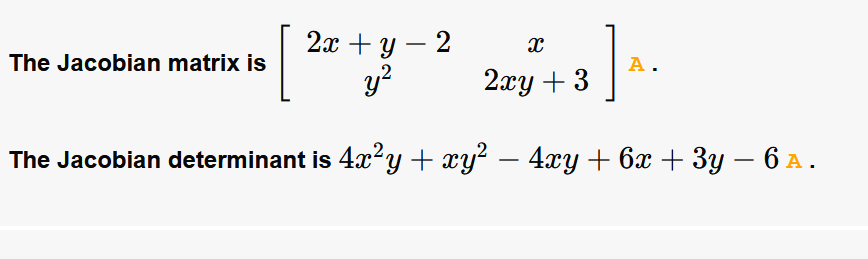

In [11]:
# Import sympy again and re-define x, y
import sympy as sp

# Define variables
x, y = sp.symbols('x y')

# Define the Jacobian determinant expression
jacobian_determinant = 4*x**2*y + x*y**2 - 4*x*y + 6*x + 3*y - 6

# Define the points to evaluate
points = [[0, 0], [3, -1], [-1, 3], [2, 0],[2,0]]

# Evaluate the determinant at each point
det_values = [jacobian_determinant.subs({x: pt[0], y: pt[1]}) for pt in points]

det_values

[-6, -12, 12, 6, 6]

In [12]:
# Define the Jacobian matrix as provided in the image
jacobian_matrix = sp.Matrix([[2*x + y - 2, x],
                             [y**2, 2*x*y + 3]])

# The trace of a matrix is the sum of its diagonal elements
jacobian_trace = jacobian_matrix.trace()

# Evaluate the trace at the given points
trace_values = [jacobian_trace.subs({x: pt[0], y: pt[1]}) for pt in points]

trace_values


[1, 0, -4, 5, 5]

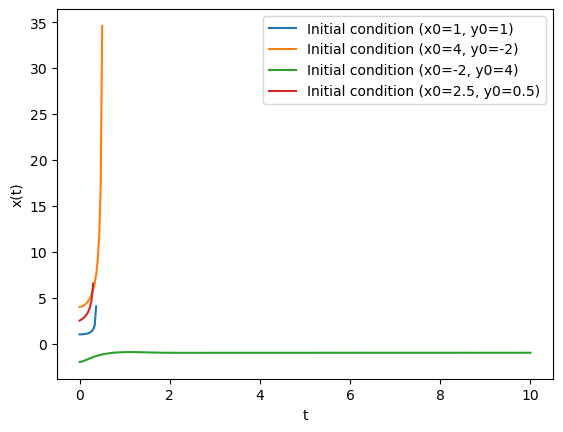

In [13]:
# Define the coupled differential equations
def coupled_system(t, vars):
    x, y = vars
    dxdt = x**2 + x*y - 2*x
    dydt = x*y**2 + 3*y
    return [dxdt, dydt]

# Define the time span for integration
t_span = (0, 10)  # Time from 0 to 10
t_eval = np.linspace(0, 10, 300)  # Time points where we want the solution

# Initial conditions
initial_conditions = [
    (1, 1),
    (4, -2),
    (-2, 4),
    (2.5, 0.5)
]

plt.figure()

# Solve the system for each set of initial conditions and plot x(t)
for idx, (x0, y0) in enumerate(initial_conditions):
    # Solve the system using solve_ivp with RK45 (which is a Runge-Kutta 4-5 method)
    sol = solve_ivp(coupled_system, t_span, [x0, y0], t_eval=t_eval, method='RK45')
    
    # Plot x(t)
    #plt.figure()
    plt.plot(sol.t, sol.y[0], label=f'Initial condition (x0={x0}, y0={y0})')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()


plt.show()


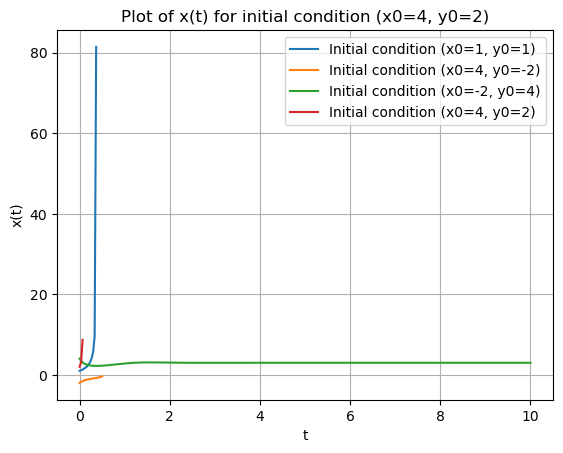

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the coupled differential equations
def coupled_system(t, vars):
    x, y = vars
    dxdt = x**2 + x*y - 2*x
    dydt = x*y**2 + 3*y
    return [dxdt, dydt]

# Define the time span for integration
t_span = (0, 10)  # Time from 0 to 10
t_eval = np.linspace(0, 10, 300)  # Time points where we want the solution

# Initial conditions
initial_conditions = [
    (1, 1),
    (4, -2),
    (-2, 4),
    (4, 2)
]

plt.figure()

# Solve the system for each set of initial conditions and plot x(t)
for idx, (x0, y0) in enumerate(initial_conditions):
    # Solve the system using solve_ivp with RK45 (which is a Runge-Kutta 4-5 method)
    sol = solve_ivp(coupled_system, t_span, [x0, y0], t_eval=t_eval, method='RK45')
    
    # Plot x(t)
    plt.plot(sol.t, sol.y[1], label=f'Initial condition (x0={x0}, y0={y0})')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title(f'Plot of x(t) for initial condition (x0={x0}, y0={y0})')
    plt.legend()
    plt.grid(True)
    
plt.show()


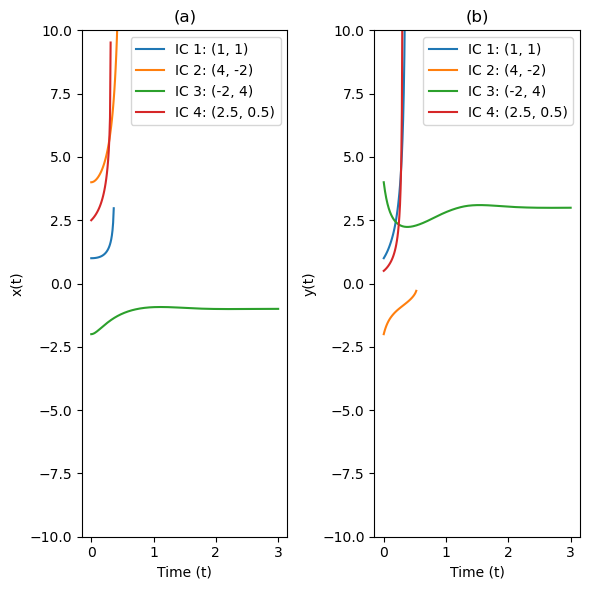

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the coupled differential equations
def coupled_system(t, vars):
    x, y = vars
    dxdt = x**2 + x*y - 2*x
    dydt = x*y**2 + 3*y
    return [dxdt, dydt]

# Define the time span for integration
t_span = (0, 3)  # Time from 0 to 10
t_eval = np.linspace(0, 3, 300)  # Time points where we want the solution

# Initial conditions
initial_conditions = [
    (1, 1),
    (4, -2),
    (-2, 4),
    (2.5, 0.5)
]

# Solve the system for all initial conditions and store the solutions
solutions = []
for (x0, y0) in initial_conditions:
    sol = solve_ivp(coupled_system, t_span, [x0, y0], t_eval=t_eval, method='RK45')
    solutions.append(sol)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(6, 6))  # 1 row, 2 columns
ax1, ax2 = axes

# Plot all x(t) on the first subplot
for idx, sol in enumerate(solutions):
    ax1.plot(sol.t, sol.y[0], label=f'IC {idx+1}: ({initial_conditions[idx][0]}, {initial_conditions[idx][1]})')

# Customize the first subplot
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('x(t)')
ax1.set_title('(a)')
ax1.legend()

# Plot all y(t) on the second subplot
for idx, sol in enumerate(solutions):
    ax2.plot(sol.t, sol.y[1], label=f'IC {idx+1}: ({initial_conditions[idx][0]}, {initial_conditions[idx][1]})')

# Customize the second subplot
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('y(t)')
ax2.set_title('(b)')
ax2.legend()

ax1.set_ylim(-10,10)
ax2.set_ylim(-10,10)


# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('1f.svg')

# Display the combined figure
plt.show()
